In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
class KMeans:
    def __init__(self,k=5,max_iters=100):
        self.k = k
        self.max_iters = max_iters
        
        self.clusters = [[] for _ in range(self.k)]
        self.centroids = []
    
    def predict(self,X):
        self.n_samples,self.n_features = X.shape
        self.X = X
        self.plot_steps=True
        
        random_idx = np.random.choice(self.n_samples,self.k,replace=False)
        self.centroids = [self.X[idx] for idx in random_idx]
        
        for _ in range(self.max_iters):
            #create clusters
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()
                
            self.old_centroids = self.centroids
            self.centroids = self._get_cluster_centroids()
            
            if self._is_converged(self.old_centroids,self.centroids):
                break
            
            
        return self._cluster_labels(self.clusters)
    
    def _is_converged(self,x1,x2):
        distances = [self._euclidean_distance(x1[idx],x2[idx]) for idx in range(self.k)]
        
        return sum(distances) == 0
    
    def _cluster_labels(self,clusters):
        labels = np.empty(self.n_samples)
        for c_idx,cluster in enumerate(clusters):
            for s_idx,s in enumerate(cluster):
                labels[s_idx] = c_idx
        return labels
            
    def _get_cluster_centroids(self):
        centroids = np.zeros((self.k,self.X.shape[1]))
        for c_idx,cluster in enumerate(self.clusters):
            centroids[c_idx] = (np.mean(self.X[cluster],axis=0))
        
        return centroids 
            
            
    def _create_clusters(self,centroids):
        clusters = [[] for _ in range(self.k)]
        for idx,x in enumerate(self.X):
            nearest_centroid_idx = self._nearest_centroid(x,centroids)
            clusters[nearest_centroid_idx].append(idx)
        return clusters
    
    def _nearest_centroid(self,x,centroids):
        distances = [self._euclidean_distance(x,k) for k in centroids]
        return np.argmin(distances)
        
    def _euclidean_distance(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

(500, 2)
3


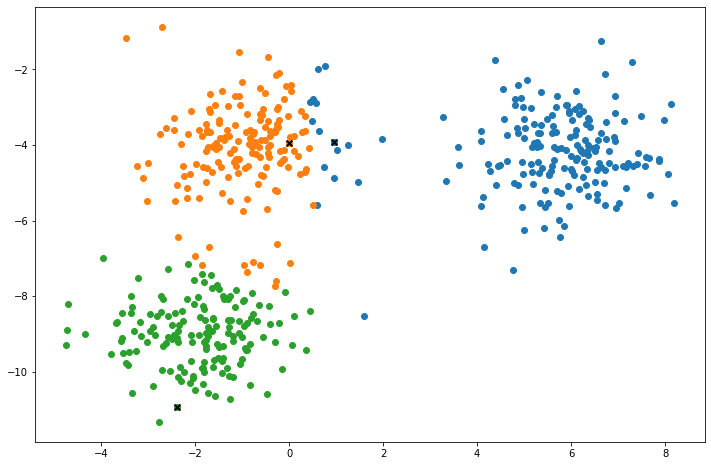

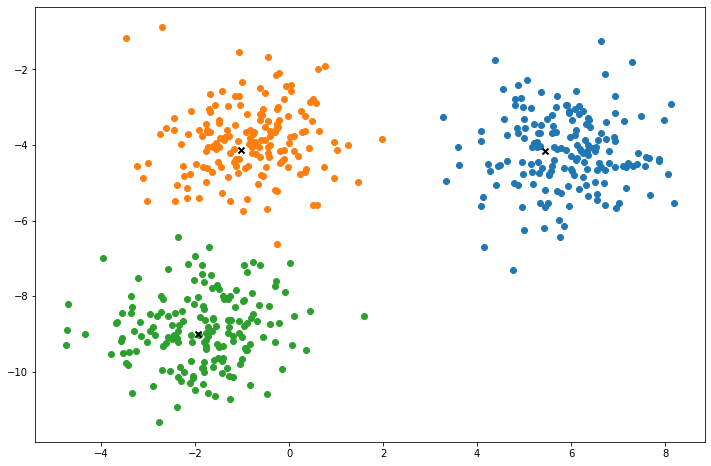

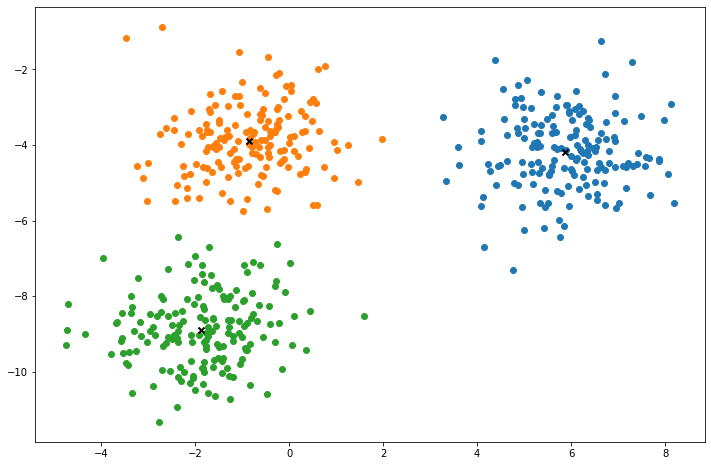

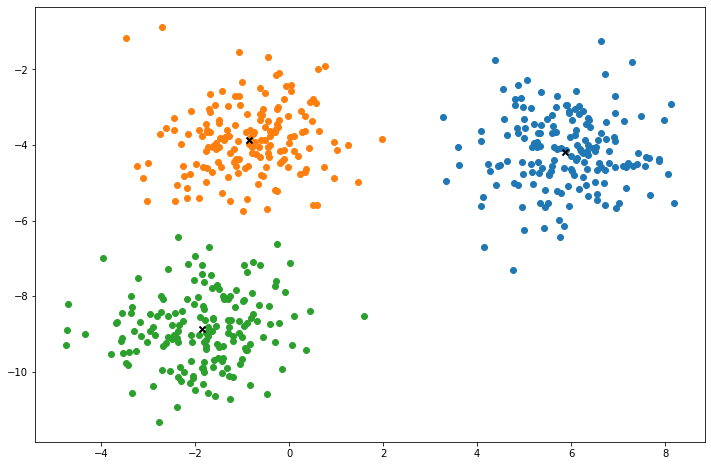

In [36]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(clusters,150)
y_pred = k.predict(X)